<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week11/Session_11_CIFAR_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp -rp '/content/drive/My Drive/py_files/models' .
!cp -rp '/content/drive/My Drive/py_files/utils' .
!pip install albumentations

In [0]:
import torch
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from utils.lr_range_test import lr_range_test
from models.custom_resnet import cust_resnet
import matplotlib.pyplot as plt
from utils.plot_clr import plot_clr

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR,MultiplicativeLR

#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

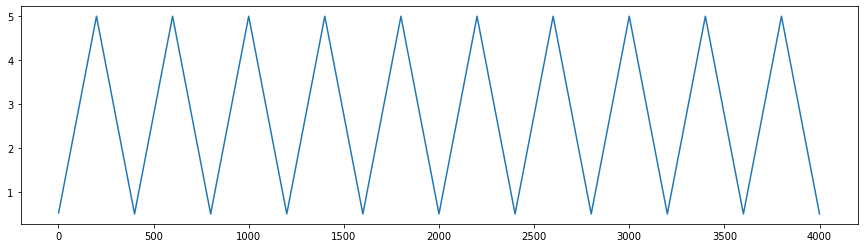

In [2]:
plot_clr()

In [2]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

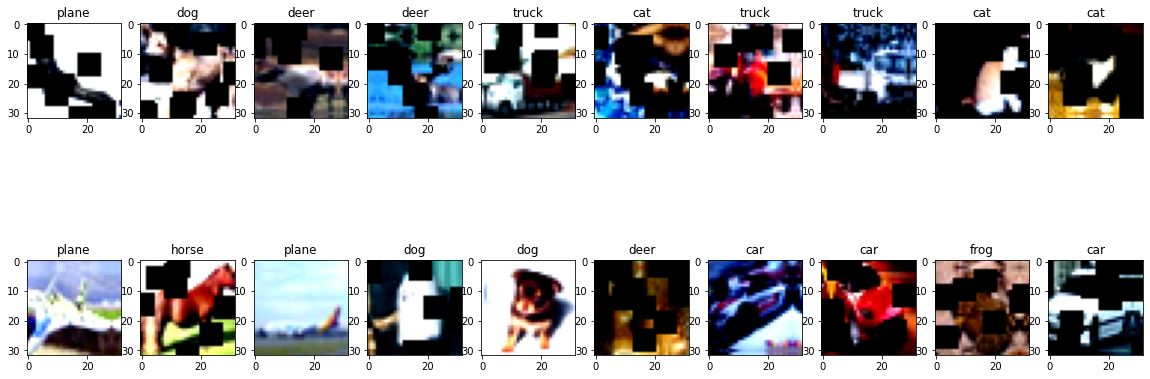

In [3]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=cust_resnet().to(device)

In [12]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/content/models/custom_resnet.py:85: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


In [6]:
learning_lr_trace,train_acc_lr,test_acc_lr= lr_range_test(model, train, test, train_loader, test_loader)

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.0001]


/content/models/custom_resnet.py:85: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.3087, Accuracy: 1243/10000 (12.43%)

Epoch: 2 Learning_Rate [0.00019599999999999997]


Loss=2.2373135089874268 Batch_id=97 Accuracy=13.96: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.2541, Accuracy: 1553/10000 (15.53%)

Epoch: 3 Learning_Rate [0.00027439999999999995]


Loss=2.218104362487793 Batch_id=97 Accuracy=16.46: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1958, Accuracy: 1785/10000 (17.85%)

Epoch: 4 Learning_Rate [0.0003841599999999999]


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1229, Accuracy: 2229/10000 (22.29%)

Epoch: 5 Learning_Rate [0.0005378239999999999]


Loss=2.0922975540161133 Batch_id=97 Accuracy=22.24: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.0324, Accuracy: 2631/10000 (26.31%)

Epoch: 6 Learning_Rate [0.0007529535999999998]


Loss=2.021496295928955 Batch_id=97 Accuracy=25.57: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.9309, Accuracy: 3015/10000 (30.15%)

Epoch: 7 Learning_Rate [0.0010541350399999995]


Loss=1.892683506011963 Batch_id=97 Accuracy=28.18: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.8273, Accuracy: 3457/10000 (34.57%)

Epoch: 8 Learning_Rate [0.0014757890559999993]


Loss=1.7906392812728882 Batch_id=97 Accuracy=31.03: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7126, Accuracy: 3893/10000 (38.93%)

Epoch: 9 Learning_Rate [0.002066104678399999]


Loss=1.747609257698059 Batch_id=97 Accuracy=34.36: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6063, Accuracy: 4192/10000 (41.92%)

Epoch: 10 Learning_Rate [0.0028925465497599986]


Loss=1.5877983570098877 Batch_id=97 Accuracy=37.93: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4995, Accuracy: 4620/10000 (46.20%)

Epoch: 11 Learning_Rate [0.004049565169663998]


Loss=1.5605098009109497 Batch_id=97 Accuracy=41.54: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4022, Accuracy: 4930/10000 (49.30%)

Epoch: 12 Learning_Rate [0.005669391237529597]


Loss=1.5015833377838135 Batch_id=97 Accuracy=44.44: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3175, Accuracy: 5272/10000 (52.72%)

Epoch: 13 Learning_Rate [0.007937147732541436]


Loss=1.4413862228393555 Batch_id=97 Accuracy=45.61: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2898, Accuracy: 5337/10000 (53.37%)

Epoch: 14 Learning_Rate [0.01111200682555801]


Loss=1.4071054458618164 Batch_id=97 Accuracy=45.00: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2562, Accuracy: 5527/10000 (55.27%)

Epoch: 15 Learning_Rate [0.015556809555781212]


Loss=1.4656922817230225 Batch_id=97 Accuracy=44.63: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3628, Accuracy: 5406/10000 (54.06%)

Epoch: 16 Learning_Rate [0.021779533378093695]


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6835, Accuracy: 5040/10000 (50.40%)

Epoch: 17 Learning_Rate [0.03049134672933117]


Loss=1.2805638313293457 Batch_id=97 Accuracy=46.86: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2267, Accuracy: 5774/10000 (57.74%)

Epoch: 18 Learning_Rate [0.04268788542106364]


Loss=1.4429898262023926 Batch_id=97 Accuracy=48.60: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4591, Accuracy: 5497/10000 (54.97%)

Epoch: 19 Learning_Rate [0.059763039589489086]


Loss=1.5816538333892822 Batch_id=97 Accuracy=49.15: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.0460, Accuracy: 4620/10000 (46.20%)

Epoch: 20 Learning_Rate [0.08366825542528472]


Loss=1.530482530593872 Batch_id=97 Accuracy=50.90: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4542, Accuracy: 5970/10000 (59.70%)

Epoch: 21 Learning_Rate [0.1171355575953986]


Loss=1.4175435304641724 Batch_id=97 Accuracy=50.92: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5175, Accuracy: 6062/10000 (60.62%)

Epoch: 22 Learning_Rate [0.16398978063355804]


Loss=1.9544414281845093 Batch_id=97 Accuracy=42.45: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.2989, Accuracy: 4331/10000 (43.31%)

Epoch: 23 Learning_Rate [0.22958569288698125]


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.9842, Accuracy: 4173/10000 (41.73%)

Epoch: 24 Learning_Rate [0.32141997004177375]


Loss=1.2945590019226074 Batch_id=97 Accuracy=44.62: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.2397, Accuracy: 5518/10000 (55.18%)



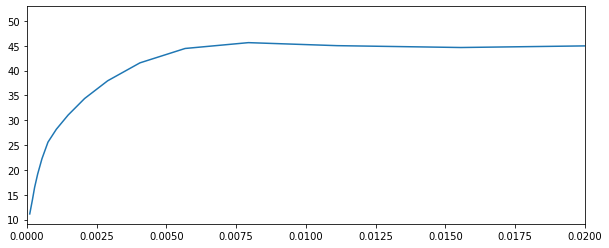

In [9]:
fig=plt.figure(figsize=(10,4))
plt.plot(learning_lr_trace, train_acc_lr )
plt.xlim(0,0.02)
plt.show()

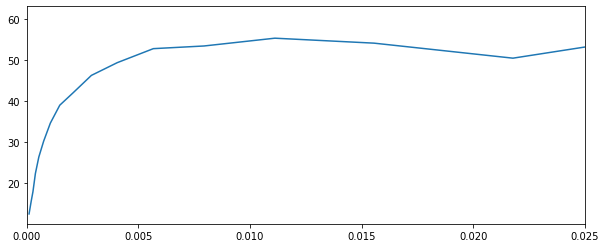

In [10]:
fig=plt.figure(figsize=(10,4))
plt.plot(learning_lr_trace,test_acc_lr )
plt.xlim(0,0.025)
plt.show()

In [0]:
model=None

In [8]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

scheduler = OneCycleLR(optimizer, max_lr=0.03,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
learning_lr_trace= []
for epoch in range(1, 25):
    
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    learning_lr_trace.append(scheduler.get_lr())
    train_loss, train_acc=train(model, device, train_loader, optimizer, epoch)
    test_loss, test_acc_l1=test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.002999999999999999]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=1.5119519233703613 Batch_id=97 Accuracy=31.27: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3710, Accuracy: 4953/10000 (49.53%)

Epoch: 2 Learning_Rate [0.006955558344737111]


Loss=1.1932743787765503 Batch_id=97 Accuracy=47.78: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1851, Accuracy: 5805/10000 (58.05%)

Epoch: 3 Learning_Rate [0.016504241998412234]


Loss=1.1485306024551392 Batch_id=97 Accuracy=54.16: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0822, Accuracy: 6337/10000 (63.37%)

Epoch: 4 Learning_Rate [0.02605043980435138]


Loss=1.1628061532974243 Batch_id=97 Accuracy=59.11: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8697, Accuracy: 7083/10000 (70.83%)

Epoch: 5 Learning_Rate [0.029999999881902766]


Loss=0.8311198949813843 Batch_id=97 Accuracy=66.22: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7985, Accuracy: 7315/10000 (73.15%)

Epoch: 6 Learning_Rate [0.02981559904845503]


Loss=0.8108563423156738 Batch_id=97 Accuracy=70.29: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6722, Accuracy: 7683/10000 (76.83%)

Epoch: 7 Learning_Rate [0.029268013899015125]


Loss=0.7322050929069519 Batch_id=97 Accuracy=73.07: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8270, Accuracy: 7277/10000 (72.77%)

Epoch: 8 Learning_Rate [0.02837217987413087]


Loss=0.7332640886306763 Batch_id=97 Accuracy=73.66: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6345, Accuracy: 8029/10000 (80.29%)

Epoch: 9 Learning_Rate [0.027152530937785864]


Loss=0.6919225454330444 Batch_id=97 Accuracy=76.32: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5640, Accuracy: 8157/10000 (81.57%)

Epoch: 10 Learning_Rate [0.025642333138551056]


Loss=0.6038547158241272 Batch_id=97 Accuracy=78.17: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7466, Accuracy: 7661/10000 (76.61%)

Epoch: 11 Learning_Rate [0.023882777274732408]


Loss=0.638020396232605 Batch_id=97 Accuracy=79.46: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4860, Accuracy: 8362/10000 (83.62%)

Epoch: 12 Learning_Rate [0.021921855411164964]


Loss=0.5201135277748108 Batch_id=97 Accuracy=80.59: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5236, Accuracy: 8327/10000 (83.27%)

Epoch: 13 Learning_Rate [0.01981305189077181]


Loss=0.567665696144104 Batch_id=97 Accuracy=81.62: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4284, Accuracy: 8581/10000 (85.81%)

Epoch: 14 Learning_Rate [0.01761388454368051]


Loss=0.45159825682640076 Batch_id=97 Accuracy=82.60: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4793, Accuracy: 8431/10000 (84.31%)

Epoch: 15 Learning_Rate [0.01538433588256656]


Loss=0.5104480981826782 Batch_id=97 Accuracy=83.52: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3780, Accuracy: 8764/10000 (87.64%)

Epoch: 16 Learning_Rate [0.01318521707353006]


Loss=0.48235955834388733 Batch_id=97 Accuracy=83.87: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4138, Accuracy: 8630/10000 (86.30%)

Epoch: 17 Learning_Rate [0.011076509305366113]


Loss=0.41729971766471863 Batch_id=97 Accuracy=85.09: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3784, Accuracy: 8764/10000 (87.64%)

Epoch: 18 Learning_Rate [0.009115727796550531]


Loss=0.3291110694408417 Batch_id=97 Accuracy=86.42: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3607, Accuracy: 8814/10000 (88.14%)

Epoch: 19 Learning_Rate [0.007356353061816279]


Loss=0.30336904525756836 Batch_id=97 Accuracy=87.02: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3391, Accuracy: 8864/10000 (88.64%)

Epoch: 20 Learning_Rate [0.005846372225684242]


Loss=0.33598724007606506 Batch_id=97 Accuracy=87.43: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3534, Accuracy: 8850/10000 (88.50%)

Epoch: 21 Learning_Rate [0.00462697016876973]


Loss=0.27009859681129456 Batch_id=97 Accuracy=88.57: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3157, Accuracy: 8958/10000 (89.58%)

Epoch: 22 Learning_Rate [0.0037314062059821424]


Loss=0.3098567724227905 Batch_id=97 Accuracy=89.13: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3094, Accuracy: 8974/10000 (89.74%)

Epoch: 23 Learning_Rate [0.0031841069353339816]


Loss=0.24855999648571014 Batch_id=97 Accuracy=89.63: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3042, Accuracy: 9013/10000 (90.13%)

Epoch: 24 Learning_Rate [0.003]


Loss=0.33810490369796753 Batch_id=97 Accuracy=90.17: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.3132, Accuracy: 8998/10000 (89.98%)

